In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from scipy.linalg import eig

In [2]:
# A matrix
A = [[1,1,0],[0,1,1]]

# its SVD
U,s,V = np.linalg.svd(A)

In [3]:
# a matrix
A = np.random.randn(5,5)

# its singular values
s = np.linalg.svd(A)[1]

# "manual" condition number
condnum = np.max(s)/np.min(s)

# compare above with numpy's cond()
print(condnum,np.linalg.cond(A))

13.289225224218063 13.28922522421806


In [4]:
# the matrix
m = 6
n = 3
A = np.random.randn(m,n)

# the two SVDs
Uf,sf,Vf = np.linalg.svd(A)
Ue,se,Ve = np.linalg.svd(A,full_matrices=False)

# examine sizes of matrices from full SVD
print(Uf.shape, sf.shape, Vf.shape)

# and from economy
print(Ue.shape, se.shape, Ve.shape)

(6, 6) (3,) (3, 3)
(6, 3) (3,) (3, 3)


In [5]:
# matrix
A = np.random.randn(4,5)

# get V
L2,V = np.linalg.eig(A.T@A)
# sort by descending eigenvalues
V = V[:,np.argsort(L2)[::-1]]

# get U
L2,U = np.linalg.eig(A@A.T)
# sort by descending eigenvalues
U = U[:,np.argsort(L2)[::-1]]

# create Sigma
S = np.zeros(A.shape)
for i,s in enumerate(np.sort(L2)[::-1]):
    S[i,i] = np.sqrt(s)

# now get the SVD
U2,S2,V2 = np.linalg.svd(A)

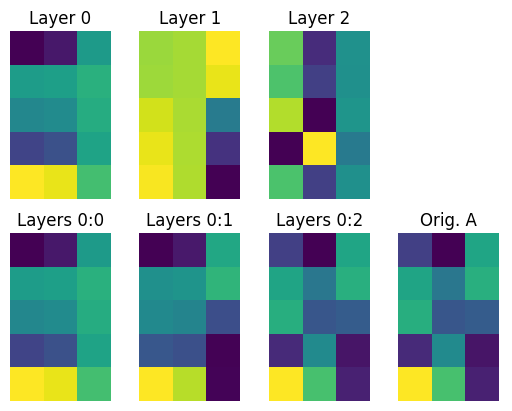

In [6]:
# setup the figure
fig,ax = plt.subplots(2,4)

# create the matrix and get its SVD
A = np.random.randn(5,3)
U,s,V = np.linalg.svd(A)
S = np.diag(s) # need Sigma as matrix

# loop over layers
for i in range(3):

    # compute and show one layer
    onelayer = np.outer(U[:,i],V[i,:])*s[i]
    ax[0,i].imshow(onelayer)
    ax[0,i].set_title('Layer %g'%i)
    ax[0,i].axis('off')

    # compute the low-rank approximation up to this layer
    lowrank = U[:,:i+1]@S[:i+1,:i+1]@V[:i+1,:]
    ax[1,i].imshow(lowrank)
    ax[1,i].set_title('Layers 0:%g'%i)
    ax[1,i].axis('off')


# finally, show the original matrix
ax[1,3].imshow(A)
ax[1,3].set_title('Orig. A')
ax[1,3].axis('off')
ax[0,3].axis('off')
plt.show()

In [7]:
# matrix sizes
m = 6
n = 16

# desired condition number
condnum = 42

# create U and V from random numbers
U,r = np.linalg.qr( np.random.randn(m,m) )
V,r = np.linalg.qr( np.random.randn(n,n) )

# create singular values vector
s = np.linspace(condnum,1,np.min((m,n)))
S = np.zeros((m,n))
for i in range(min((m,n))):
    S[i,i] = s[i]

# construct matrix
A = U@S@V.T

# confirm!
np.linalg.cond(A)

41.99999999999985

<ipython-input-8-070af014c4ba>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imread('https://upload.wikimedia.org/wikipedia/en/8/86/Einstein_tongue.jpg')


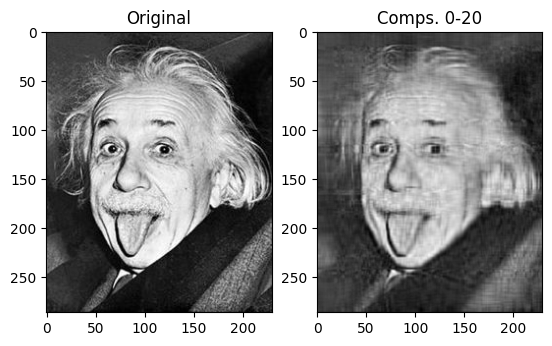

In [8]:
# download picture and convert to float
pic = imread('https://upload.wikimedia.org/wikipedia/en/8/86/Einstein_tongue.jpg')
np.array(pic,dtype=float)

# SVD and create sigma matrix
U,s,V = np.linalg.svd( pic )
S = np.zeros(pic.shape)
for i in range(len(s)):
    S[i,i] = s[i]

# number of components to use
comps = slice(0,21)

# create the low-rank approx.
lowrank = U[:,comps]@S[comps,comps]@V[comps,:]


# show the original and low-rank
plt.subplot(1,2,1)
plt.imshow(pic,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(lowrank,cmap='gray')
plt.title('Comps. %g-%g'%(comps.start,comps.stop-1));

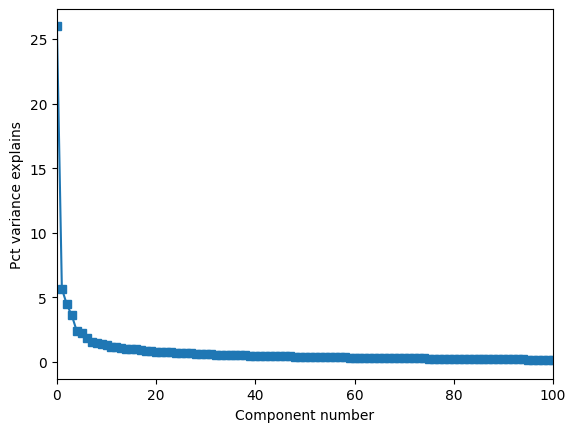

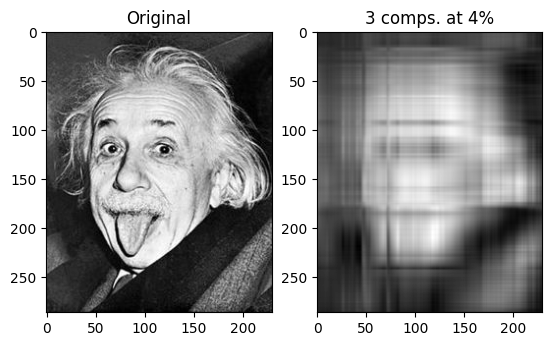

In [9]:
# convert to percent explained
s = 100*s/np.sum(s)

# visualize
plt.plot(s,'s-')
plt.xlim([0,100])
plt.xlabel('Component number')
plt.ylabel('Pct variance explains')
plt.show()


# threshold in percent
thresh = 4
I,J=np.ix_(s>thresh,s>thresh) # comps > X%
lowrank = np.squeeze(U[:,J]@S[I,J]@V[J,:])


# show the original and low-rank
plt.subplot(1,2,1)
plt.imshow(pic,cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(lowrank,cmap='gray')
plt.title('%g comps. at %g%%'%(len(I),thresh));

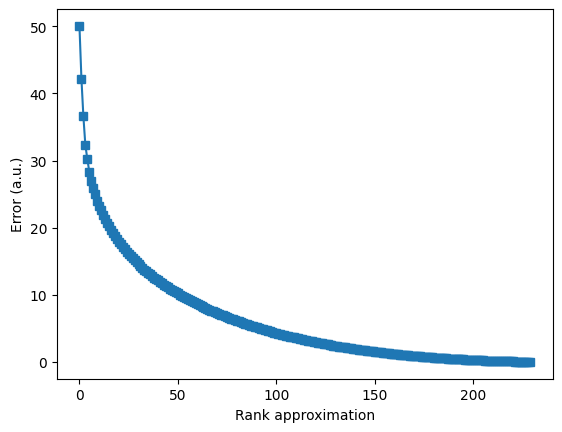

In [10]:
# initialize RMS vector
RMS = np.zeros(len(s))

# loop through singular values (SVD layers)
for si in range(len(s)):

    # create the low-rank img
    i = si+1 # mind the indexing!
    lowrank = U[:,:i]@S[:i,:i]@V[:i,:]

    # get the difference
    diffimg = lowrank - pic

    # compute RMS for this rank
    RMS[si] = np.sqrt(np.mean(diffimg.flatten()**2))


# how's it look?!?
plt.plot(RMS,'s-')
plt.xlabel('Rank approximation')
plt.ylabel('Error (a.u.)')
plt.show()

In [11]:
# some random tall matrix
X = np.random.randint(low=1,high=7,size=(4,2))

# eq. 29
U,s,V = np.linalg.svd(X)
S = np.zeros(X.shape)
for i,ss in enumerate(s):
    S[i,i] = ss

# eq. 30
longV1 = np.linalg.inv( (U@S@V).T@U@S@V ) @ (U@S@V).T

# eq. 31
longV2 = np.linalg.inv( V.T@S.T@U.T@U@S@V ) @ (U@S@V).T

# eq. 32
longV3 = np.linalg.inv(V.T@S.T@S@V) @ (U@S@V).T

# eq. 33
longV4 = V@np.linalg.matrix_power(S.T@S,-1) @ V@V.T@S.T@U.T

# eq. 34
MPpinv = np.linalg.pinv(X)

# now compare any to pinv, e.g.,
longV3 - MPpinv

array([[ 1.38777878e-16,  5.55111512e-17,  1.11022302e-16,
         1.66533454e-16],
       [-1.11022302e-16, -2.77555756e-17, -8.32667268e-17,
        -1.38777878e-16]])

In [12]:
k = 5
n = 13
a = np.linalg.pinv(np.ones((n,1))*k)

# check for zeros
a - 1/(k*n)

array([[-6.93889390e-18, -3.46944695e-18, -3.46944695e-18,
        -3.46944695e-18, -3.46944695e-18, -3.46944695e-18,
        -3.46944695e-18, -3.46944695e-18, -3.46944695e-18,
        -3.46944695e-18, -3.46944695e-18, -3.46944695e-18,
        -3.46944695e-18]])

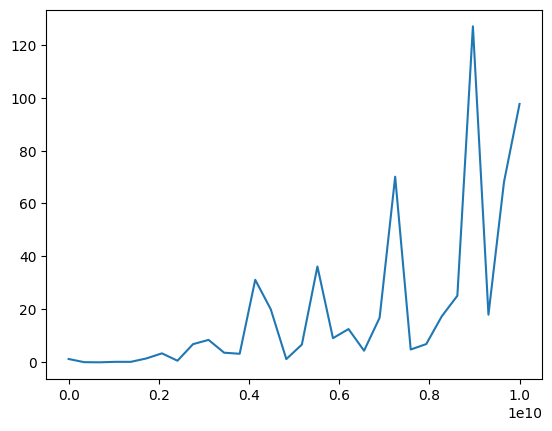

In [13]:
# matrix size
M = 10

# condition numbers
cns = np.linspace(10,1e10,30)

# results vector
avediffs = np.zeros(len(cns))

# loop over condition numbers
for condi in range(len(cns)):

    # create A
    U,r = np.linalg.qr( np.random.randn(M,M) )
    V,r = np.linalg.qr( np.random.randn(M,M) )
    S = np.diag(np.linspace(cns[condi],1,M))
    A = U@S@V.T # construct matrix

    # create B
    U,r = np.linalg.qr( np.random.randn(M,M) )
    V,r = np.linalg.qr( np.random.randn(M,M) )
    S = np.diag(np.linspace(cns[condi],1,M))
    B = U@S@V.T # construct matrix

    # GEDs and sort
    l1 = eig(A,B)[0]
    l2 = eig(np.linalg.inv(B)@A)[0]
    l1.sort()
    l2.sort()

    # get differences
    avediffs[condi] = np.mean(np.abs(l1-l2))

# plot them!
plt.plot(cns,avediffs)
plt.show()